In [1]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()


using OptimalCluster
using CSV, DataFrames, LinearAlgebra

  Activating project at `~/Documents/OptimalCluster.jl`


In [2]:
datasets = ["donut3.csv", "wineqr.csv", "banana.csv"]

data = Dict{String, Dict{String, Any}}()
m = 3

# Load data
for dataset in datasets
    data[dataset] = Dict{String, Any}()
    data_df = CSV.read("../datasets/$dataset", DataFrame)

    n = size(data_df, 1)
    X = Matrix(data_df)
    distances = [norm(X[i, :] - X[j, :]) for i in 1:n, j in 1:n]

    # Data
    data[dataset]["problem_data"] = OptimalCluster.HomogeneousCluster.ClusterProblemData(n, m, distances)
end

In [ ]:
using JuMP

for dataset in datasets
    model = OptimalCluster.HomogeneousCluster.jump_formulation(data[dataset]["problem_data"])
    optimize!(model)

    data[dataset]["opt_value"] = objective_value(model)
end

In [10]:
n_steps = 100
lower_bound = 40
ϵ = .5

gap = 0.1

for dataset in datasets
    problem_data = data[dataset]["problem_data"]

    initial_u = rand(problem_data.n_points)
    best_solution, results = OptimalCluster.HomogeneousCluster.subgradient_algorithm(initial_u, problem_data, .6, n_steps, lower_bound, ϵ; stop_gap=gap)

    data[dataset]["best_solution"] = best_solution
    data[dataset]["results"] = results
end

In [ ]:
for dataset in datasets
    println(sum(data[dataset]["problem_data"].d.*data[dataset]["best_solution"]))
    println(length(data[dataset]["results"]))
end

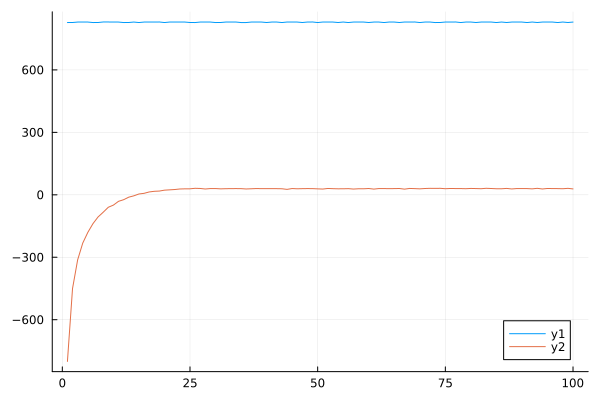

In [9]:
using Plots

results = data["donut3.csv"]["results"]

plot([result[1] for result in results])
plot!([result[2] for result in results])

In [ ]:
results = data["banana.csv"]["results"]


plot([result[1] for result in results])
plot!([result[2] for result in results])

In [ ]:
results = data["wineqr.csv"]["results"]


plot([result[1] for result in results])
plot!([result[2] for result in results])